### Music genre classification Problem

### First All the libraries needed will be imported

In [82]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### The read_diff_files method is a method to return the files as dataframes
- It uses as an input the path for different files

In [59]:
def read_diff_files(data_dir, train_file, test_file,sample_submission):
    current_directory = os.getcwd()
    path_to_data = current_directory + data_dir  
    df_train = pd.read_csv(path_to_data + train_file)
    df_test = pd.read_csv(path_to_data+test_file)
    df_sam_subm = pd.read_csv(path_to_data+sample_submission)  
    return df_train,df_test,df_sam_subm

df_train,df_test,df_sam_subm = read_diff_files(data_dir = "/Data",train_file = "/train.csv", test_file ="/test.csv", sample_submission = "/sample_submission.csv")

### Method drop_unwanted_cols 
- drops the id column from the dataframe
- keeps the ids and return them as well but they are not in the dataframe anymore 

In [60]:
def drop_unwanted_cols (df_train,df_test,col_name = "Id"):
    train_id = df_train[col_name]
    test_id = df_test[col_name]
    df_train = df_train.drop([col_name], axis=1)
    df_test = df_test.drop([col_name], axis=1)
    return df_train,df_test,train_id,test_id
df_train,df_test,train_id,test_id = drop_unwanted_cols(df_train,df_test,col_name = "Id") 

In [61]:
df_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


### Method data_exploration
- return info about a certain dataframe
- return null perceantage in all columns
- return the different datatypes in the dataframe
- Print the shape of the dataframe
- takes as input the dataframe that we want to explore 

In [62]:
def data_explortation(dataframe):
    print("------------This is different dataset Info ---------------")
    print(dataframe.info())
    print("---------------------------------------------------------")
    null_counts = dataframe.isnull().sum()
    null_percentage = (null_counts/len(dataframe))* 100
    columns_with_null_percentage = null_percentage[null_percentage > 0]
    print("----------Those are the columns with null values and the percentage-------------")
    print(columns_with_null_percentage)
    print("-------------------------------------------------------------------")
    print("----------Those are the Data types in the training dataset-------------")
    data_types = list(set(dataframe.dtypes.tolist())) 
    print(data_types)
    print("-------------------------------------------------------------------")
    print("--------------This is the size of the Dataframe----------------")
    print(dataframe.shape)
    print("-----------------------------------------------------------------")

    return columns_with_null_percentage, data_types 
cols_with_null_perc,date_types_df = data_explortation(df_train) 

------------This is different dataset Info ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14063 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12787 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10855 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64

### The feature_types method:
- return the dataframe divided by the type of the data
- print the num of features according to the type



In [63]:
def features_types(data_frame):
    categorical_features = data_frame.select_dtypes(include=['object'])
    numeric_features = data_frame.select_dtypes(include=['int64'])
    float_features = data_frame.select_dtypes(include=['float64'])

    num_of_categorial_features = categorical_features.shape[1]
    num_of_numeric_features = numeric_features.shape[1]
    num_of_float_features = float_features.shape[1]
    
    print(f"Number of categorial features:{num_of_categorial_features} ")
    print(f"Number of numeric features:{num_of_numeric_features}")
    print(f"num_of_float_features:{num_of_float_features}")
    return categorical_features,numeric_features,float_features
categorical_features,numeric_features,float_features = features_types(df_train)  

Number of categorial features:2 
Number of numeric features:3
num_of_float_features:12


#### The countplot of the sns is used to see if there is a class imbalance

<AxesSubplot:xlabel='Class', ylabel='count'>

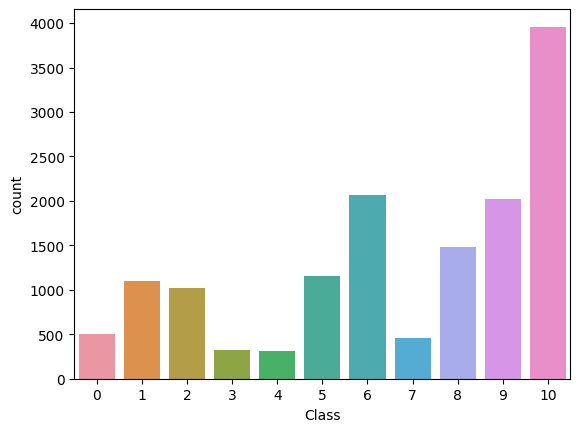

In [64]:
sns.countplot(x='Class', data= df_train)

#### From the above graph we can deduce that there is a class imbalance

#### The hist is used to show the disturbation of the different features 

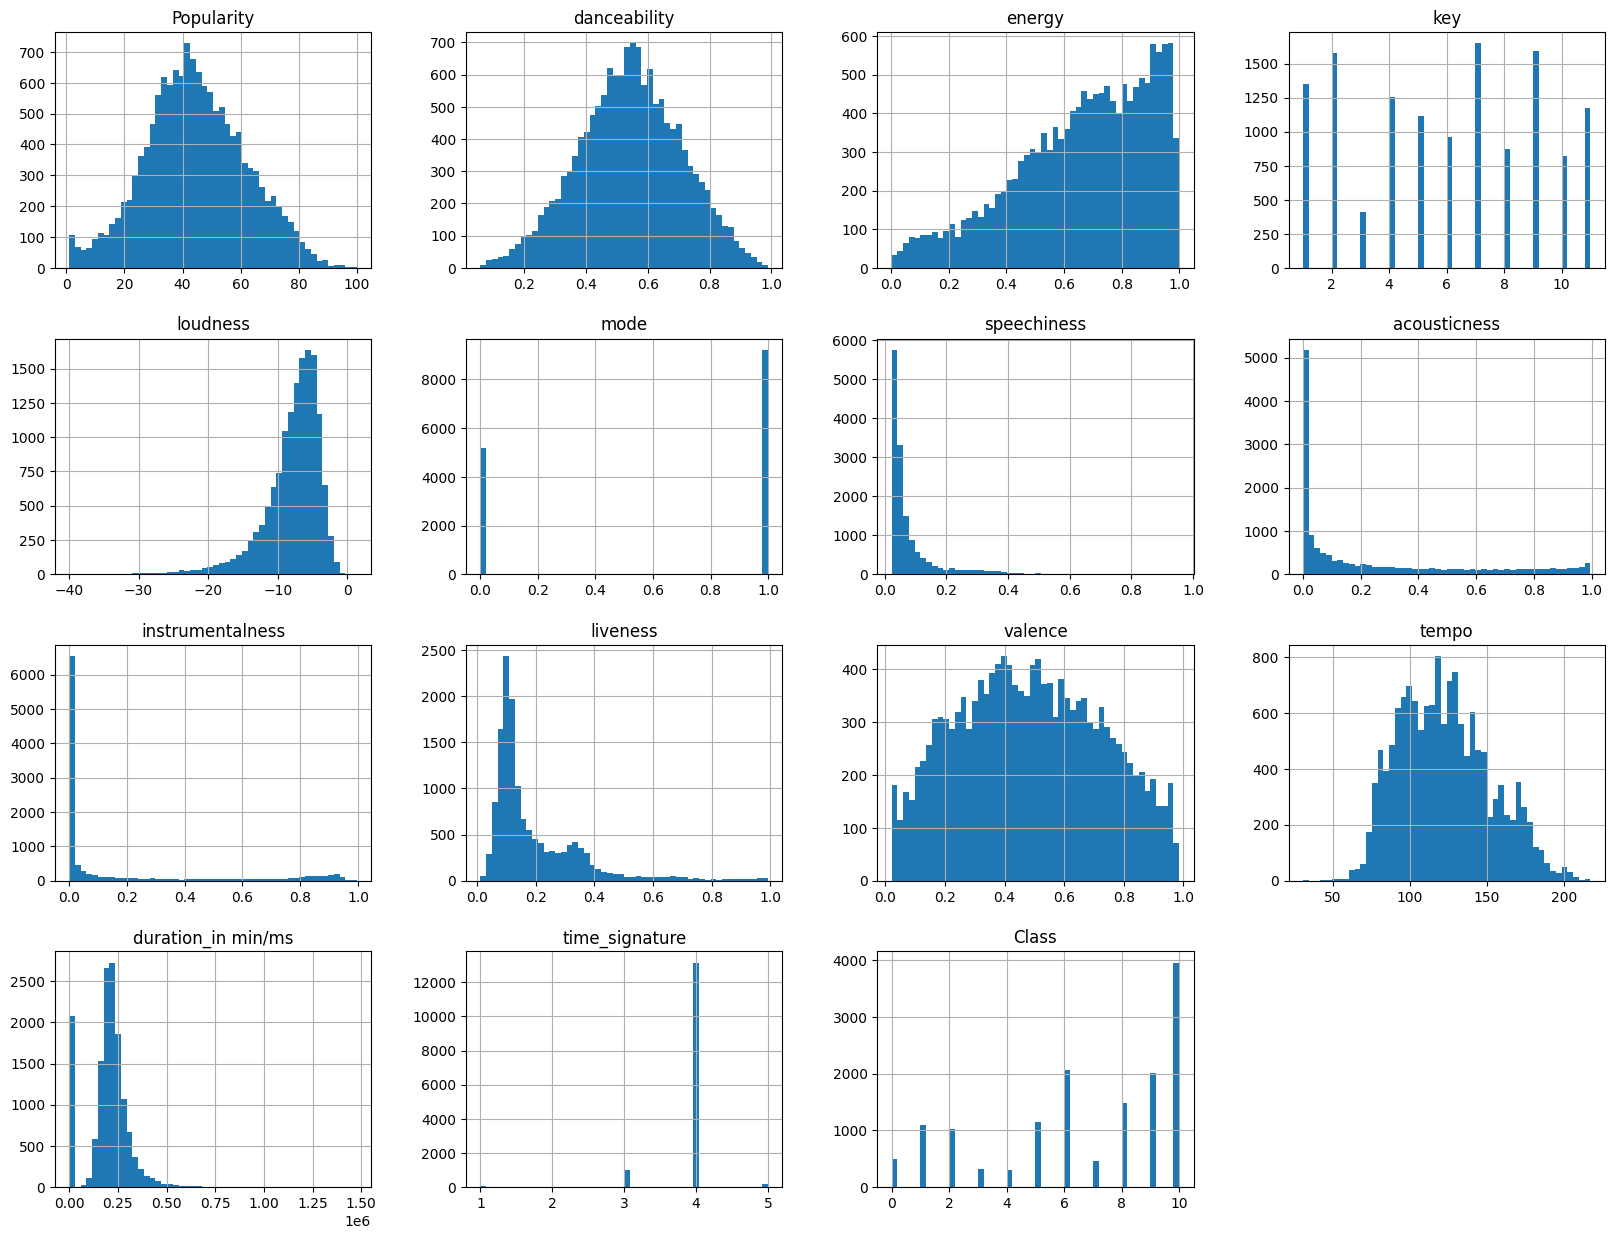

In [65]:
df_train.hist(figsize = (20,15),bins = 50)
plt.show()

### the co-relation matrix is used to gain insights about how the features are realted to each other

<AxesSubplot:>

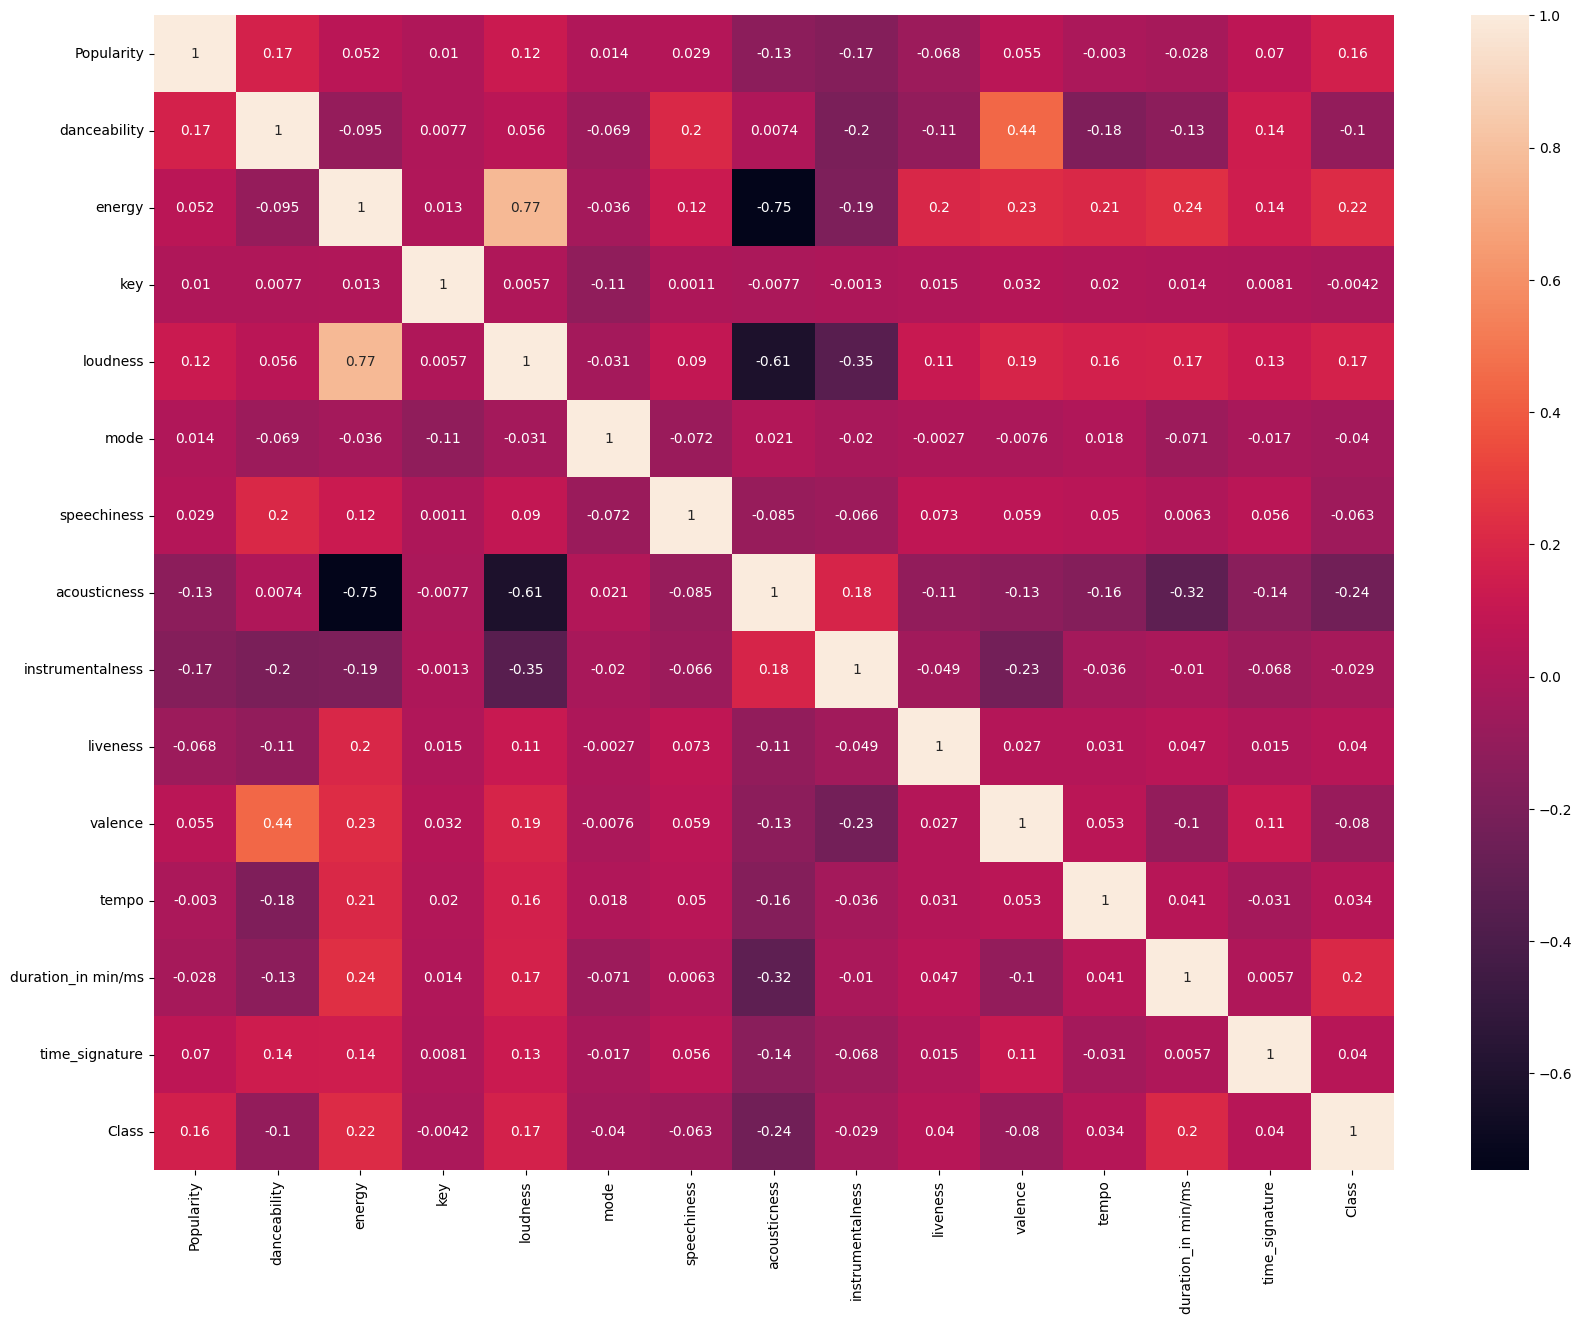

In [66]:
corrmat= df_train.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat,annot=True)

### The corealtion matrix is used to see what featues are most related to the class of the music  

In [67]:
df_train.corr()['Class'].sort_values(ascending = False)

Class                 1.000000
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
liveness              0.040101
time_signature        0.040053
tempo                 0.034496
key                  -0.004175
instrumentalness     -0.028631
mode                 -0.040092
speechiness          -0.062784
valence              -0.080036
danceability         -0.101152
acousticness         -0.240609
Name: Class, dtype: float64

#### From the above results, it can be seen that the two most important for feature classifcation are energy and the duration of the song

#### The msno librarly is used to visualize the missing info in the different features
- From the msno matrix plot, we can also deduce if the missing info are realted or not  

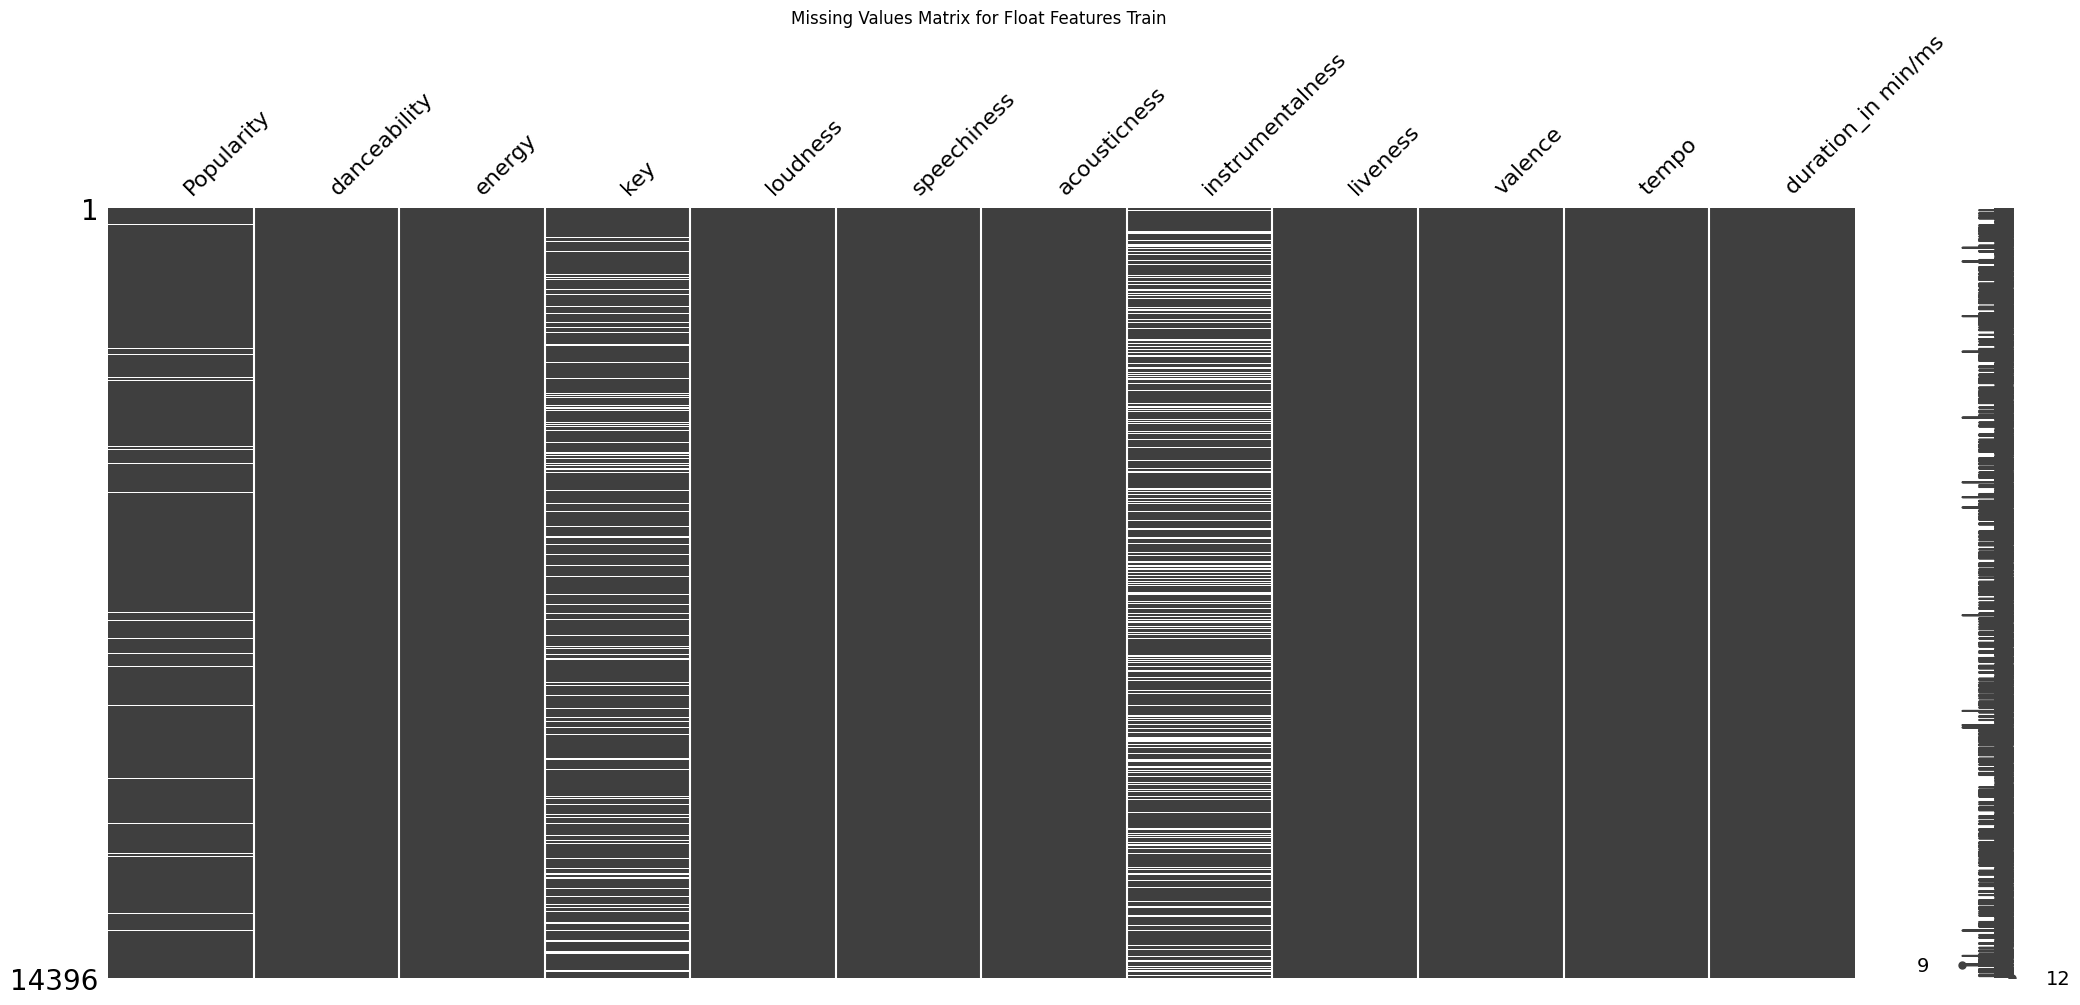

In [68]:
msno.matrix(float_features)
plt.title('Missing Values Matrix for Float Features Train ')
plt.show()

#### The numerical imputer method imputes the missing values of the numeric features of the dataframe
- It uses the mean strategy
- Returrns the imputed dataframe
- An argument of the method is wether it is the train dataframe or not
    - if it is a train then returns then it uses fit_transform on the imputer
    - if it is a test then only transform on the imputer using only the knowledge from the train dataframe 
 

In [69]:
def numerical_imputer(dataframe, numeric_imputer = None ,numeric_scaler= None, strategy='mean', train = True):
    #X_numeric = dataframe.select_dtypes(include=['float64','int64'])
    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    #print(X_numeric.columns)
    if(train == True):
        imputer = SimpleImputer(strategy=strategy)
        scaler = StandardScaler()
        dataframe[numeric_columns] = imputer.fit_transform(dataframe[numeric_columns])
        dataframe[numeric_columns] = scaler.fit_transform(dataframe[numeric_columns])
        return dataframe, imputer, scaler
    else:
        imputer = numeric_imputer
        scaler = numeric_scaler
        dataframe[numeric_columns] = imputer.transform(dataframe[numeric_columns])
        dataframe[numeric_columns] = scaler.transform(dataframe[numeric_columns])  
        return  dataframe 
    
subset_df_train = df_train.drop(columns=['Class'])

subset_df_train,numeric_imputer,numeric_scaler = numerical_imputer(subset_df_train)
df_test,imputer,scaler = numerical_imputer(df_test,numeric_imputer,numeric_scaler)

df_train = pd.concat([subset_df_train, df_train["Class"]], axis=1)



In [53]:
df_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Marina Maximilian,Not Afraid,-0.437113,-1.263390,-0.535777,1.010097,0.308549,-1.334049,-0.494173,0.422160,1.050566e-16,-0.563774,-1.049740,1.006641,0.043450,0.210416,9
1,The Black Keys,Howlin' for You,1.305483,1.098986,0.358445,1.673277,0.580657,0.749598,0.087129,-0.706136,-4.970874e-01,-0.576333,-0.444231,0.346192,-0.072868,0.210416,6
2,Royal & the Serpent,phuck u,0.000000,0.247081,0.600012,0.346916,0.445342,0.749598,-0.214678,-0.790508,1.729286e+00,0.553950,0.620630,1.261369,-0.349708,0.210416,10
3,Detroit Blues Band,Missing You,-1.889277,-0.169809,-1.502046,0.000000,-1.678525,0.749598,-0.575203,2.123611,-5.936065e-01,0.654419,0.061056,1.685203,0.877455,-2.571167,2
4,Coast Contra,My Lady,0.201839,0.132285,0.485585,0.015326,0.691323,-1.334049,1.982527,-0.205029,1.050566e-16,0.095557,0.553815,-1.164094,0.483956,0.210416,5


In [70]:
categorical_features,numeric_features,float_features = features_types(df_train)
 


Number of categorial features:2 
Number of numeric features:1
num_of_float_features:14


#### Msno matrix is used after imputation ,It can be seen that after the missing values are imputed, there are  no missing values anymore 

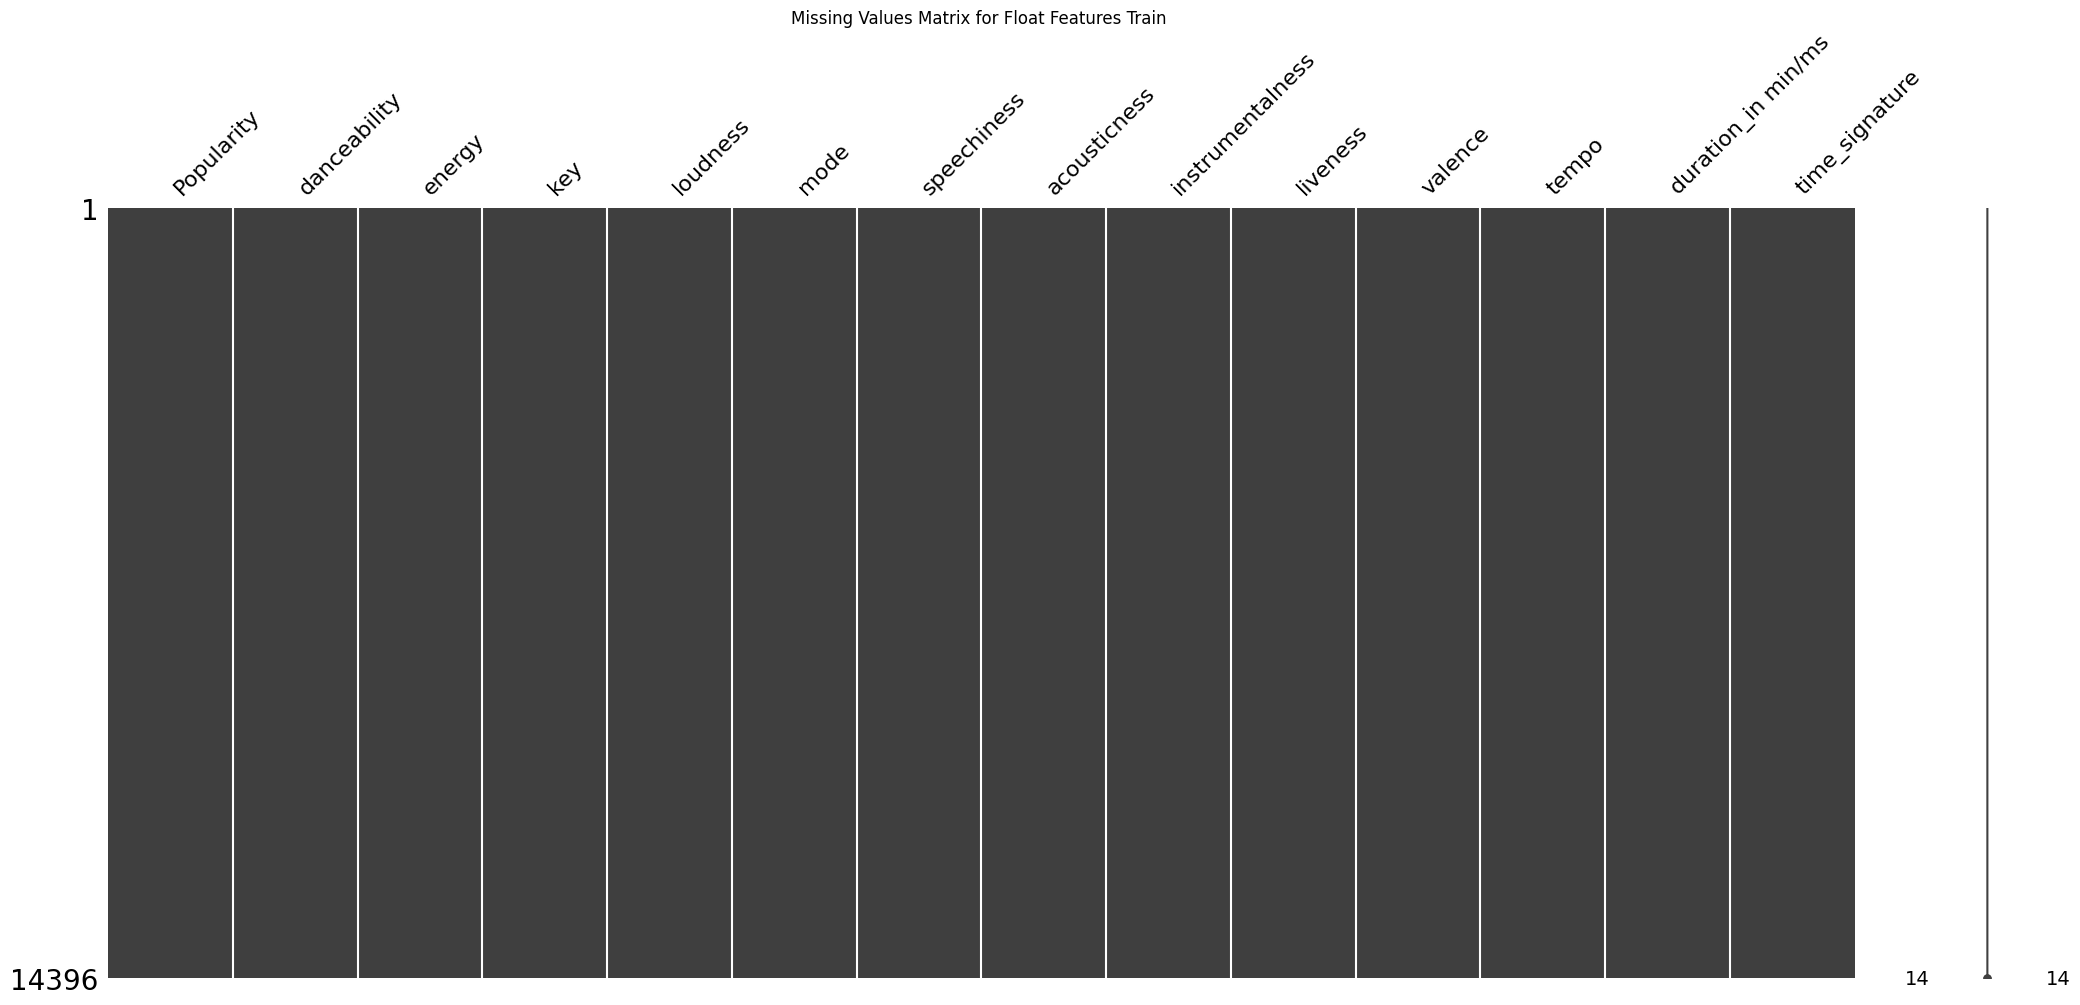

In [71]:
msno.matrix(float_features)
plt.title('Missing Values Matrix for Float Features Train ')
plt.show()

#### The next cell see how many unique values in the artist_name and track_name features
- this step helps us to decide, whether it'll be helpful to drop those features or keep them 

In [72]:
len(df_train['Artist Name'].unique())
print(len(df_train['Track Name'].unique()))
print(df_train.shape)

12455
(14396, 17)


#### From the above results
- The track names are all different, so it was decided to drop
- The artist name however is repaeated, so it was decided to be kept

### Transform_categorial_classes method 
- This method transforms the categorical features in the dataframes
- it takes as an argument a boolean that represents whether it is the training dataframe or not
    - if it is the training dataframe then fit_transform is used
    - if no then transform is used

In [73]:
df_train = df_train.drop(['Artist Name', 'Track Name'], axis=1)
df_test = df_test.drop(['Artist Name', 'Track Name'], axis=1)

In [74]:
def transform_categorial_classes(df, labelencoder,train = True):
    if(labelencoder != None):
        le = labelencoder
    else:       
        le=LabelEncoder()
    for column in df.columns:
        if df[column].dtype=='object':
            if(train == True):    
                df[column]=le.fit_transform(df[column])
            else:
                df[column]=le.transform(df[column])            
    if train == True:        
        return df,le
    else:
        return df    
df_train,label_encoder = transform_categorial_classes(df_train, labelencoder = None,train = True)
df_test = transform_categorial_classes(df_test, labelencoder = label_encoder,train = False)

### The Next cell is for having the labels seperately from the dataframe 


In [75]:
y_train = df_train["Class"]
df_train = df_train.drop(['Class'], axis=1)
df_train

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,-0.437113,-1.263390,-0.535777,1.010097,0.308549,-1.334049,-0.494173,0.422160,1.050566e-16,-0.563774,-1.049740,1.006641,0.043450,0.210416
1,1.305483,1.098986,0.358445,1.673277,0.580657,0.749598,0.087129,-0.706136,-4.970874e-01,-0.576333,-0.444231,0.346192,-0.072868,0.210416
2,0.000000,0.247081,0.600012,0.346916,0.445342,0.749598,-0.214678,-0.790508,1.729286e+00,0.553950,0.620630,1.261369,-0.349708,0.210416
3,-1.889277,-0.169809,-1.502046,0.000000,-1.678525,0.749598,-0.575203,2.123611,-5.936065e-01,0.654419,0.061056,1.685203,0.877455,-2.571167
4,0.201839,0.132285,0.485585,0.015326,0.691323,-1.334049,1.982527,-0.205029,1.050566e-16,0.095557,0.553815,-1.164094,0.483956,0.210416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,0.143752,0.386044,1.201811,-1.642626,1.216560,0.749598,0.819922,-0.775996,-6.727522e-01,0.516274,0.695797,-0.090880,-0.043992,0.210416
14392,-1.017979,-0.653160,1.223001,0.678506,0.104962,0.749598,-0.265175,-0.793604,1.407556e+00,-0.631591,-1.183370,0.417728,0.733748,0.210416
14393,-1.308412,-0.773998,1.180620,1.673277,0.887517,0.749598,-0.326241,-0.787800,-6.742149e-01,0.886755,0.357547,1.533057,-0.210997,0.210416
14394,-0.437113,-0.302731,1.371331,-1.642626,1.385641,0.749598,0.135277,-0.790511,-6.491712e-01,-0.457025,0.336667,-0.022323,-0.123447,0.210416


#### The resample method
- It resamples the data to make the classes balanced
- It uses the SMOTE library for this

In [76]:
def resample(x,y):
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(df_train,y_train )
    return X_res, y_res
X_res,y_res = resample(df_train, y_train)

### The best_model method:
- In the method, different models are tested
- The model that is choosen is the model that have the best cross validation score.
- The method returns the choosen model as well as the cross validation score  

In [77]:
def best_model(X,y):
    lr_model = LogisticRegression()
    rf_model =  RandomForestClassifier()
    sgdc_model =  SGDClassifier()
    k_neigbours_model =  KNeighborsClassifier()
    dec_tree_model = DecisionTreeClassifier()
    xgb_model = XGBClassifier()

    models = [lr_model, rf_model, sgdc_model, k_neigbours_model,dec_tree_model,xgb_model]
    best_cv_score = 0
    for model in models:
        cv_score = cross_val_score(model, X,y,scoring='accuracy', cv=5)
        cv_score_mean = cv_score.mean()
        print("-----------------------------")
        print(model)
        print(cv_score_mean)
        print("------------------------------")
        if(cv_score_mean > best_cv_score ):
            best_cv_score = cv_score_mean
            opt_model = model
    return opt_model,best_cv_score

choosen_model,cv_score =  best_model(X_res,y_res)        
        


/Users/mohannadrateb/Desktop/portfolio/Port_projects/Data-Science-Eng-Portfolio/Classification/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/mohannadrateb/Desktop/portfolio/Port_projects/Data-Science-Eng-Portfolio/Classification/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/

-----------------------------
LogisticRegression()
0.5871318491672115
------------------------------
-----------------------------
RandomForestClassifier()
0.82314249521359
------------------------------
-----------------------------
SGDClassifier()
0.5552134660437446
------------------------------
-----------------------------
KNeighborsClassifier()
0.8058516184545358
------------------------------
-----------------------------
DecisionTreeClassifier()
0.7081455912361666
------------------------------
-----------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, m

In [79]:
choosen_model

RandomForestClassifier()

### From the above cell we can see that the best model was the RandomForestClassfier

#### The predict_test model
- The best choosen model(the random forest classifier gets fitted on the training data)
- The model then predicts on the test data
- The method returns a predictions df, it contains the id as well as the model prediction for that id 

In [83]:
def predict_test(model,X_train,y_train,X_test,test_id):
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_val)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_val, y_pred)
    print(f'This is the accuracy on validation data: {accuracy}')
    predictions = model.predict(X_test)
    submission = pd.DataFrame({'Id': test_id, 'genre_pred': predictions })
    return submission

predictions_df = predict_test(choosen_model,X_res,y_res,df_test,test_id) 



This is the accuracy on validation data: 0.813203214695752


In [84]:
predictions_df

,Id,genre_pred
0,14397,5
1,14398,6
2,14399,9
3,14400,10
4,14401,5
...,...,...
3595,17992,8
3596,17993,5
3597,17994,1
3598,17995,2


### The next plot exp:
- using the featture_importnaces_ attrbuite of the random forest model
- A plot can be made of the most important fetures
- The y_axis represent the accuradcy decrease if we remove a certain feature

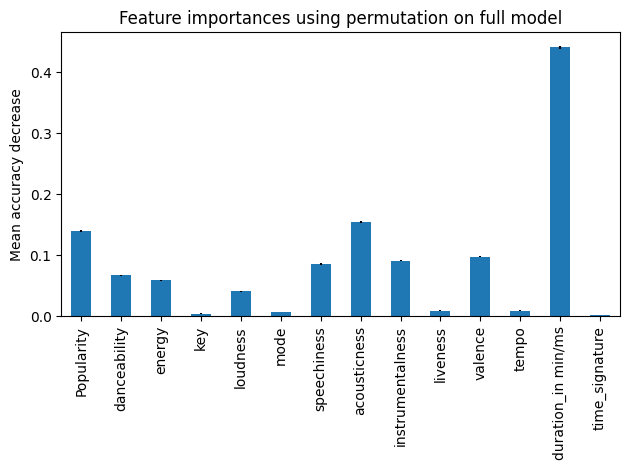

In [87]:
importances = choosen_model.feature_importances_
feature_names = df_test.columns
result = permutation_importance(
    choosen_model, X_res, y_res, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()